Loan data From Lending Club

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Data clean

In [2]:
url = 'C:/Users/Qiulan/.spyder/LoanStats_2017Q2.csv'
df = pd.read_csv(url, skiprows = 1, low_memory = False)
df.shape

(105453, 137)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105453 entries, 0 to 105452
Columns: 137 entries, id to hardship_last_payment_amount
dtypes: float64(111), object(26)
memory usage: 110.2+ MB


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
0,NaN,NaN,16000.0,16000.0,16000.0,60 months,12.62%,360.95,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,8000.0,8000.0,8000.0,36 months,14.08%,273.74,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26000.0,26000.0,26000.0,36 months,9.93%,838.10,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,18950.0,18950.0,18950.0,60 months,21.45%,517.47,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,9600.0,9600.0,9600.0,36 months,7.97%,300.70,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check columns that have missing values more than 60%

In [5]:
check_null = df.isnull().sum(axis = 0).sort_values(ascending = False)/float(len(df))
print(check_null[check_null > 0.6])

hardship_last_payment_amount                  1.000000
hardship_amount                               1.000000
url                                           1.000000
member_id                                     1.000000
hardship_type                                 1.000000
hardship_reason                               1.000000
hardship_status                               1.000000
deferral_term                                 1.000000
hardship_start_date                           1.000000
hardship_payoff_balance_amount                1.000000
hardship_end_date                             1.000000
payment_plan_start_date                       1.000000
hardship_length                               1.000000
hardship_dpd                                  1.000000
hardship_loan_status                          1.000000
orig_projected_additional_accrued_interest    1.000000
desc                                          1.000000
id                                            0.999981
sec_app_mt

Delete columns that have more than 60% missing data

In [6]:
thresh_count = len(df) * 0.6
df = df.dropna(thresh = thresh_count, axis = 1)
print(len(df.columns))

100


Check the data again

In [7]:
check_null = df.isnull().sum(axis = 0).sort_values(ascending = False)/float(len(df))
print(check_null.head(10))

il_util                  0.126900
mths_since_recent_inq    0.113330
emp_title                0.064332
num_tl_120dpd_2m         0.050070
next_pymnt_d             0.037201
mo_sin_old_il_acct       0.025168
mths_since_rcnt_il       0.025168
bc_util                  0.011313
percent_bc_gt_75         0.010886
bc_open_to_buy           0.010858
dtype: float64


Check columns that have unique value

In [8]:
check_unique = df.apply(pd.Series.nunique)
print(check_unique[check_unique ==1])

pymnt_plan                 1
recoveries                 1
collection_recovery_fee    1
policy_code                1
hardship_flag              1
dtype: int64


Delete columns that have unique value

In [9]:
df = df.loc[:, check_unique != 1]
print(df.shape)

(105453, 95)


In [10]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,16000.0,16000.0,16000.0,60 months,12.62%,360.95,C,C1,teacher,10+ years,...,0.0,3.0,100.0,100.0,0.0,0.0,319900.0,44830.0,2400.0,16000.0
1,8000.0,8000.0,8000.0,36 months,14.08%,273.74,C,C3,Registered Nurse,9 years,...,0.0,0.0,100.0,100.0,0.0,0.0,133955.0,87827.0,27300.0,91655.0
2,26000.0,26000.0,26000.0,36 months,9.93%,838.10,B,B2,Dealer,7 years,...,0.0,0.0,100.0,60.0,0.0,1.0,89700.0,41031.0,55300.0,34400.0
3,18950.0,18950.0,18950.0,60 months,21.45%,517.47,D,D5,QA Manager,1 year,...,0.0,1.0,88.0,100.0,0.0,0.0,1401945.0,109236.0,73600.0,40664.0
4,9600.0,9600.0,9600.0,36 months,7.97%,300.70,A,A5,Physician Assistant,< 1 year,...,0.0,2.0,93.2,28.6,0.0,0.0,391409.0,278895.0,18900.0,297759.0
5,2000.0,2000.0,2000.0,36 months,7.07%,61.82,A,A2,Paralegal,2 years,...,0.0,2.0,100.0,0.0,0.0,0.0,44660.0,17761.0,15000.0,29460.0
6,15000.0,15000.0,15000.0,36 months,7.97%,469.84,A,A5,Senior Software Engineer,3 years,...,0.0,1.0,100.0,10.0,0.0,0.0,327003.0,51954.0,50000.0,39620.0
7,2400.0,2400.0,2400.0,36 months,11.99%,79.71,B,B5,Engineer,3 years,...,0.0,1.0,88.2,100.0,0.0,0.0,72412.0,64426.0,6100.0,59012.0
8,10000.0,10000.0,10000.0,36 months,7.21%,309.74,A,A3,Regional Practice Director,7 years,...,0.0,7.0,98.3,40.0,0.0,0.0,330503.0,24170.0,46100.0,16613.0
9,20000.0,20000.0,20000.0,36 months,9.44%,640.10,B,B1,Executive Assistant,< 1 year,...,0.0,1.0,84.6,33.3,0.0,0.0,67717.0,37895.0,22900.0,42517.0


Delete rows that have missing values more than 80%

In [11]:
df.drop([105451, 105452], inplace = True)

In [12]:
print(df.dtypes.unique())

[dtype('float64') dtype('O')]


Explore potential columns that can be converted to numerical from 'np.object'

In [13]:
objectCols = df.select_dtypes(include = ['O']).columns
objectCols

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'revol_util', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [14]:
df[objectCols[:10]]

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status
0,60 months,12.62%,C,C1,teacher,10+ years,MORTGAGE,Not Verified,Jun-2017,Current
1,36 months,14.08%,C,C3,Registered Nurse,9 years,RENT,Verified,Jun-2017,Current
2,36 months,9.93%,B,B2,Dealer,7 years,OWN,Not Verified,Jun-2017,Current
3,60 months,21.45%,D,D5,QA Manager,1 year,MORTGAGE,Verified,Jun-2017,Current
4,36 months,7.97%,A,A5,Physician Assistant,< 1 year,OWN,Not Verified,Jun-2017,Current
5,36 months,7.07%,A,A2,Paralegal,2 years,RENT,Not Verified,Jun-2017,Current
6,36 months,7.97%,A,A5,Senior Software Engineer,3 years,MORTGAGE,Not Verified,Jun-2017,Current
7,36 months,11.99%,B,B5,Engineer,3 years,RENT,Not Verified,Jun-2017,Current
8,36 months,7.21%,A,A3,Regional Practice Director,7 years,OWN,Not Verified,Jun-2017,Current
9,36 months,9.44%,B,B1,Executive Assistant,< 1 year,RENT,Not Verified,Jun-2017,Current


In [15]:
df[objectCols[10:]]

,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,debt_consolidation,Debt consolidation,021xx,MA,Jun-1992,105.8%,w,Aug-2017,Sep-2017,Aug-2017,INDIVIDUAL
1,vacation,Vacation,070xx,NJ,Nov-2006,86.7%,w,Aug-2017,Sep-2017,Aug-2017,INDIVIDUAL
2,home_improvement,Home improvement,198xx,DE,Jul-1998,12.4%,w,Aug-2017,Sep-2017,Aug-2017,INDIVIDUAL
3,credit_card,Credit card refinancing,950xx,CA,Mar-1982,98%,w,Aug-2017,Sep-2017,Aug-2017,INDIVIDUAL
4,credit_card,Credit card refinancing,880xx,NM,Aug-2005,48.6%,w,Aug-2017,Sep-2017,Aug-2017,INDIVIDUAL
5,medical,Medical expenses,917xx,CA,Apr-2005,0.3%,w,Aug-2017,Sep-2017,Aug-2017,INDIVIDUAL
6,debt_consolidation,Debt consolidation,631xx,MO,Aug-2007,28.9%,w,Aug-2017,Sep-2017,Aug-2017,INDIVIDUAL
7,vacation,Vacation,601xx,IL,Apr-2007,66.6%,w,Aug-2017,Sep-2017,Aug-2017,INDIVIDUAL
8,credit_card,Credit card refinancing,327xx,FL,Aug-1993,32.7%,w,Aug-2017,Sep-2017,Aug-2017,INDIVIDUAL
9,credit_card,Credit card refinancing,300xx,GA,Aug-1992,81.7%,w,Aug-2017,Sep-2017,Aug-2017,INDIVIDUAL


# Descard the following non-informative features:

sub_grade: has repetitive information as grade.
emp_title:
issue_d:
title:
zip_code: imcomplete thereby unmeaningful.
addr_state: it cannot reflect a person's capability to pay back.
earliest_cr_line: 
initial_list_status:
next_pymnt_d: 
last_pymnt_d
last_credit_pull_d

Delete non-informative columns using business insights

In [16]:
drop_list = ['sub_grade', 'emp_title','issue_d', 'title','zip_code',  'addr_state', 'earliest_cr_line', 'initial_list_status', 'next_pymnt_d','last_pymnt_d',
        'last_credit_pull_d']
df.drop(drop_list, axis = 1, inplace = True)

In [17]:
df[df.select_dtypes(include = ['O']).columns].head()

,term,int_rate,grade,emp_length,home_ownership,verification_status,loan_status,purpose,revol_util,application_type
0,60 months,12.62%,C,10+ years,MORTGAGE,Not Verified,Current,debt_consolidation,105.8%,INDIVIDUAL
1,36 months,14.08%,C,9 years,RENT,Verified,Current,vacation,86.7%,INDIVIDUAL
2,36 months,9.93%,B,7 years,OWN,Not Verified,Current,home_improvement,12.4%,INDIVIDUAL
3,60 months,21.45%,D,1 year,MORTGAGE,Verified,Current,credit_card,98%,INDIVIDUAL
4,36 months,7.97%,A,< 1 year,OWN,Not Verified,Current,credit_card,48.6%,INDIVIDUAL


Convert Object type to Float

In [18]:
df[['int_rate', 'revol_util']] = df[['int_rate', 'revol_util']].replace('%', '', regex = True).astype('float')/100
df.term = df.term.str.strip('months').astype('float')

In [19]:
df.emp_length.replace('n/a', np.nan, inplace = True)
df.emp_length.fillna(value=0,inplace=True)
df.emp_length.replace(to_replace='[^0-9]+', value='', inplace = True,  regex=True)
df.emp_length = df.emp_length.astype(int)

In [20]:
print(df[['int_rate', 'revol_util', 'term', 'emp_length']].head())

   int_rate  revol_util  term  emp_length
0    0.1262       1.058  60.0          10
1    0.1408       0.867  36.0           9
2    0.0993       0.124  36.0           7
3    0.2145       0.980  60.0           1
4    0.0797       0.486  36.0           1


In [21]:
ObjectCols = df.select_dtypes(include = ['O']).columns

In [22]:
df[ObjectCols].head()

,grade,home_ownership,verification_status,loan_status,purpose,application_type
0,C,MORTGAGE,Not Verified,Current,debt_consolidation,INDIVIDUAL
1,C,RENT,Verified,Current,vacation,INDIVIDUAL
2,B,OWN,Not Verified,Current,home_improvement,INDIVIDUAL
3,D,MORTGAGE,Verified,Current,credit_card,INDIVIDUAL
4,A,OWN,Not Verified,Current,credit_card,INDIVIDUAL


In [23]:
df[ObjectCols] = df[ObjectCols].fillna('Unknown')

Check the unique value for categorical variables

In [24]:
df[ObjectCols].apply(pd.Series.nunique)

grade                   7
home_ownership          5
verification_status     3
loan_status             6
purpose                13
application_type        3
dtype: int64

Plot Loan_status, which is target variable

In [25]:
df.loan_status.value_counts()

Current               99850
Fully Paid             3896
In Grace Period         932
Late (31-120 days)      436
Late (16-30 days)       312
Charged Off              25
Name: loan_status, dtype: int64

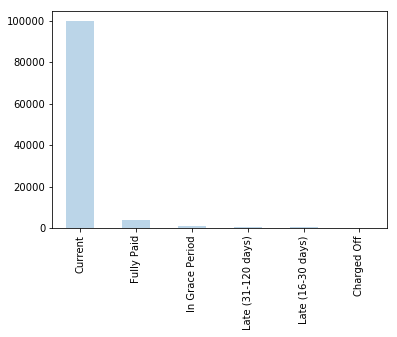

In [26]:
df.loan_status.value_counts().plot(kind='bar',alpha=.30)
plt.show()

Remove samples whose Loan_status is 'current'

In [27]:
print(df.shape)
df = df[df.loan_status != 'Current']
print(df.shape)

(105451, 84)
(5601, 84)


Group samples whose Loan_status is not 'fully paid' as default

In [28]:
df.reset_index(inplace = True)

In [29]:
df.loan_status.head()

0    Fully Paid
1    Fully Paid
2    Fully Paid
3    Fully Paid
4    Fully Paid
Name: loan_status, dtype: object

In [30]:
df.loc[:, 'loan_status'] = df.loc[:, 'loan_status'].apply(lambda x: 0 if x.find('Fully Paid')==0 else 1)

C:\Users\Qiulan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
df.loan_status.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [32]:
df.loan_status.unique()

array([0, 1], dtype=int64)

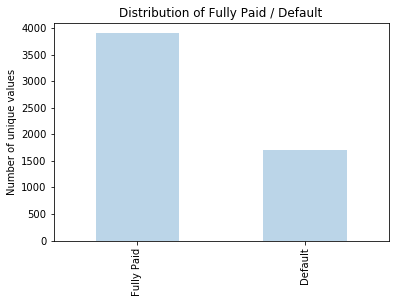

In [33]:
df.loan_status.value_counts().plot(kind = 'bar', alpha = 0.30)
plt.xticks((0, 1), ('Fully Paid', 'Default'))
plt.ylabel('Number of unique values')
plt.title('Distribution of Fully Paid / Default')
plt.show()

Calculate the raio of Fully paid to default. Result is 2.3, so we don't have sevious imbalanced data problem

In [34]:
ratio = (df.loan_status.count() - df.loan_status.sum()) / df.loan_status.sum()
print(ratio)

2.285043988269795


# Feature Engineering

Feature generation

In [35]:
df.installment_feat = df.installment/df.annual_inc/12

Ordinal feature: Grade

In [36]:
df.grade.unique()

array(['E', 'B', 'C', 'G', 'A', 'D', 'F'], dtype=object)

In [37]:
mapping_dict = {"grade": {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}}

In [38]:
df = df.replace(mapping_dict)

In [39]:
df.grade.head()

0    5
1    2
2    3
3    7
4    2
Name: grade, dtype: int64

In [40]:
CATEG_COLUMNS = list(df.select_dtypes(include = ['O']).columns)
NUMERIC_COLUMNS = list(set(df.columns) - set(CATEG_COLUMNS))
print(CATEG_COLUMNS)
print(len(NUMERIC_COLUMNS))

['home_ownership', 'verification_status', 'purpose', 'application_type']
81


Continuous & Continuous: examine correlation matrix and drop highly correlated data to address multicollinearity. (plot the heatmap when you are free)

In [41]:
def drop_corr(df, threshold = 0.95):
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

In [42]:
drop_corr_num = drop_corr(df[NUMERIC_COLUMNS], threshold = 0.95)
print(len(drop_corr_num))

12


In [43]:
y = df.loan_status

In [44]:
NUMERIC_COLUMNS = list(set(NUMERIC_COLUMNS) - set(drop_corr_num))
NUMERIC_COLUMNS.remove('loan_status')
print(len(NUMERIC_COLUMNS))

68


In [45]:
#Define get_categ_column()
def get_categ_column(df, cols = CATEG_COLUMNS):
    dummies = pd.get_dummies(df[cols], drop_first = True, prefix_sep = '_')
    return dummies

In [46]:
cat = get_categ_column(df, cols = CATEG_COLUMNS)
num = df[NUMERIC_COLUMNS]

In [47]:
X = pd.concat([cat, num], axis = 1)

In [48]:
len(X.columns)

86

In [49]:
# Import preprocessing modules
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest

# Import pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [50]:
cols = X.columns

In [51]:
get_categ_data = FunctionTransformer(lambda x: x[cat.columns], validate = False)

In [52]:
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate = False)

In [53]:
pl_num = Pipeline([ ('selector', get_numeric_data),                   
                   ('imputer', Imputer(missing_values='NaN', strategy='mean', axis=0)),
                  ('scaler', StandardScaler())])

FeatureUnion

In [54]:
join_features = FeatureUnion(
            transformer_list = [('categ_features', get_categ_data),
                ('numeric_features', pl_num)
            ])

In [55]:
join_features.fit(X[cols])

FeatureUnion(n_jobs=1,
       transformer_list=[('categ_features', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x0000000024E1BD08>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=False)), ('numeric_features', Pipeline(steps=[('selector', FunctionTransformer(a...rategy='mean', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]))],
       transformer_weights=None)

In [56]:
X[cols] = join_features.transform(X[cols])

In [57]:
X.head()

,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,...,all_util,mort_acc,total_bc_limit,mths_since_rcnt_il,total_rev_hi_lim,delinq_2yrs,acc_now_delinq,num_tl_30dpd,mo_sin_old_rev_tl_op,total_bal_ex_mort
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.752803,-0.865161,-0.860190,0.143883,-0.881130,-0.386007,-0.072294,-0.055176,-0.036520,-0.935010
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-2.655869,3.966647,2.316683,2.240658,1.841839,0.710355,-0.072294,-0.055176,0.427074,0.694956
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.181849,-0.865161,-0.202309,-0.415257,-0.186552,-0.386007,-0.072294,-0.055176,-1.279796,-0.829564
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.721217,-0.328293,0.126632,-0.555042,0.361363,-0.386007,-0.072294,-0.055176,1.649278,-0.516881
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.015793,1.282309,-0.128730,-0.042497,-0.280638,-0.386007,-0.072294,-0.055176,-0.637086,0.212476


# Feature Selection

Wrapper: Recursive Feature Elimination

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
rfe = RFE(lr, 30)
rfe = rfe.fit(X, y)

In [59]:
rfe_cols = X.columns[rfe.support_]
rfe_cols

Index(['home_ownership_OWN', 'verification_status_Source Verified',
       'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_medical',
       'purpose_other', 'purpose_renewable_energy', 'purpose_vacation',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'total_rec_prncp', 'total_rec_late_fee', 'term', 'emp_length',
       'avg_cur_bal', 'out_prncp_inv', 'num_op_rev_tl', 'dti', 'total_rec_int',
       'mths_since_recent_bc', 'funded_amnt_inv', 'annual_inc', 'max_bal_bc',
       'tot_hi_cred_lim', 'grade', 'num_rev_tl_bal_gt_0', 'open_il_12m',
       'bc_util', 'total_bc_limit', 'mo_sin_old_rev_tl_op'],
      dtype='object')

Filter

In [60]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

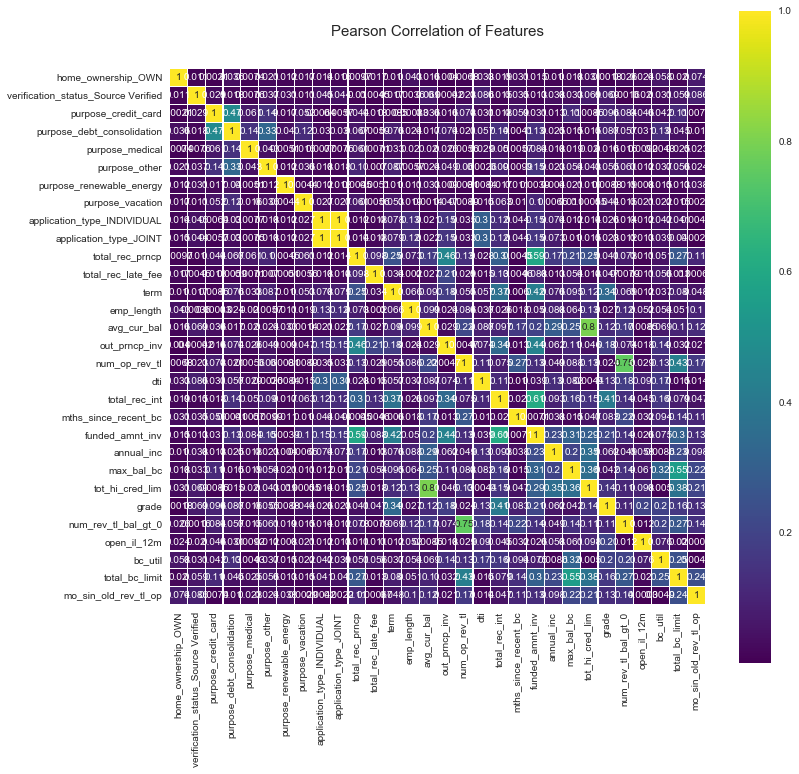

In [61]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X[rfe_cols].corr().abs(),linewidths=0.1,vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True)
plt.show()

In [62]:
filter_drop_cols = drop_corr(X[rfe_cols], threshold = 0.75)
filter_cols = rfe_cols.drop(filter_drop_cols)
print(filter_drop_cols)
print(len(filter_cols))

['application_type_JOINT', 'tot_hi_cred_lim', 'num_rev_tl_bal_gt_0']
27


Embeded

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier(n_estimators=10,random_state=123)
rfc = rfc.fit(X[filter_cols], y)
features = pd.Series(rfc.feature_importances_, index = filter_cols)
features = features.sort_values(ascending = False)

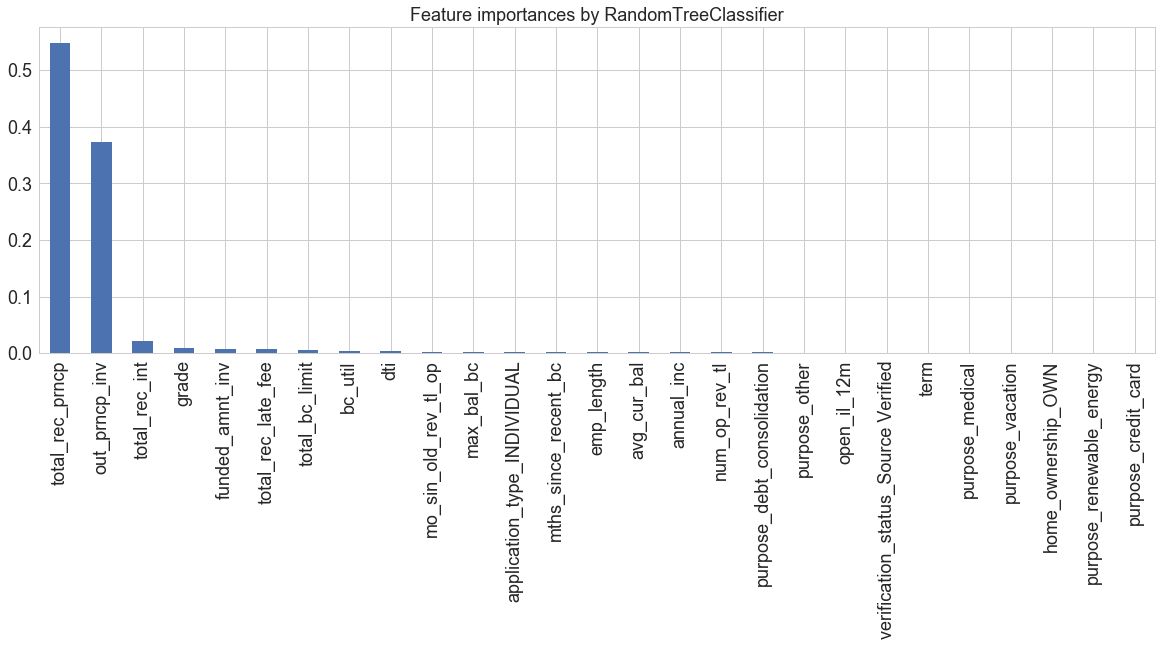

In [65]:
fig = plt.figure(figsize=(20,6))
features.plot(kind = 'bar')
plt.title("Feature importances by RandomTreeClassifier", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

# Create train and test sets

In [66]:
X = X[filter_cols]
len(X.columns)

27

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42,
                                                   stratify = y)

In [73]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid_logreg = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid_logreg, cv = 5)


In [74]:
# Create the hyperparameter grid
param_grid_rfc = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators":[10, 20]}
# Instantiate the random forest classifier: rfc
rfc = RandomForestClassifier()
# Instantiate the GridSearchCV object: rfc_cv
rfc_cv = GridSearchCV(rfc, param_grid_rfc, cv = 5)

Fit to the training data

In [69]:
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [75]:
rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, None], 'max_features': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'n_estimators': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [71]:
from sklearn import metrics
def measure_performance(X_test,y_test,model, show_accuracy=True, 
                        show_classification_report=True, show_confusion_matrix=True,
                       show_tuned_parameters_and_score=True):
    y_pred=model.predict(X_test)   
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y_test,y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y_test,y_pred),"\n")
        
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y_test,y_pred),"\n")
        
    if show_tuned_parameters_and_score:
        print("Tuned Parameters: {}".format(model.best_params_))
        print("Best score is {}".format(model.best_score_))

In [72]:
measure_performance(X_test,y_test,logreg_cv, show_accuracy=True, 
                        show_classification_report=True, show_confusion_matrix=True,
                       show_tuned_parameters_and_score=True)

Accuracy:0.998 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1169
          1       1.00      0.99      1.00       512

avg / total       1.00      1.00      1.00      1681
 

Confusion matrix
[[1169    0]
 [   3  509]] 

Tuned Decision Tree Parameters: {'C': 31.622776601683793, 'penalty': 'l1'}
Best score is 0.9979591836734694


In [76]:
measure_performance(X_test,y_test,rfc_cv, show_accuracy=True, 
                        show_classification_report=True, show_confusion_matrix=True,
                       show_tuned_parameters_and_score=True)

Accuracy:0.998 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1169
          1       1.00      0.99      1.00       512

avg / total       1.00      1.00      1.00      1681
 

Confusion matrix
[[1169    0]
 [   4  508]] 

Tuned Decision Tree Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Best score is 0.999234693877551


# Conclusions

Regularized logistic regression and random forest are both able to generate excellent results in terms of accuracy and f1 score. In additions, results obtained with both models are similar.